This notebook is adapted from the fast.ai version 3 lesson 2


In [0]:
from fastai.vision import *

In [0]:
path = Path('data')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['down', 'up']

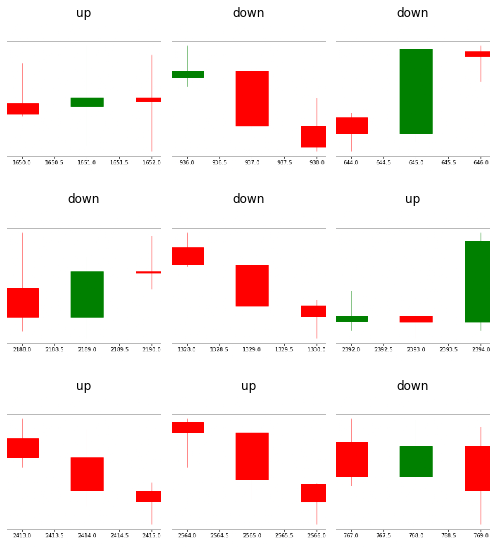

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['down', 'up'], 2, 2194, 548)

## Train model

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.310935,1.026757,0.483577,12:16
1,1.083046,0.979481,0.514599,12:55
2,0.868717,0.806975,0.474453,12:25
3,0.740888,0.795664,0.481752,12:45


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

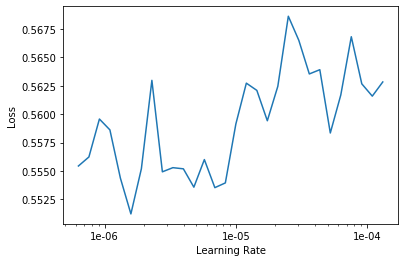

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.554050,0.859562,0.511927,18:16
1,0.511697,0.864563,0.510092,18:12


In [0]:
learn.save('stage-2')